In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sldvol.core import find_volumes

%matplotlib inline

### Default setup data:

In [2]:
lipid_y = [-0.39, -0.39, -0.39]
protein_y = [1.68, 2.3678, 3.49]
solvent_y = [-0.56, 2.07, 6.35]

setup_conc = [0, 38, 100]

### Experimental data (sample):

In [3]:
# Experimental sample:
sample_d2o_conc = [0, 38, 100]
sample_slds = [0.017, 1.8985, 4.961]
sample_sld_errors = [0.08, 0.13, 0.012]

In [4]:
result, bootstrapped_vols = find_volumes(
    sample_d2o_conc, sample_slds, sample_sld_errors, 
    setup_conc, solvent_y, 
    setup_conc, protein_y, 
    setup_conc, lipid_y,
    N=10000, return_samples=True
)

In [5]:
print("\nVolume fractions:\n\n\tSolvent: {:0.1f} +/- {:0.1f} [%]" \
      "\n\tProtein: {:0.1f} +/- {:0.1f} [%]" \
      "\n\tLipid:   {:0.1f} +/- {:0.1f} [%]".format(
          result[0][0], result[0][1], result[1][0], 
          result[1][1], result[2][0], result[2][1]
      )
)


Volume fractions:

	Solvent: 65.0 +/- 0.7 [%]
	Protein: 25.0 +/- 1.3 [%]
	Lipid:   10.0 +/- 0.6 [%]


### PLOT the curves:

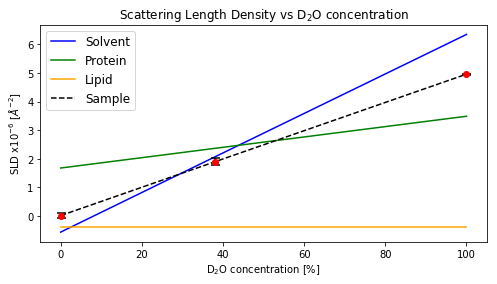

In [6]:
x = np.linspace(0, 100, 3)

plt.figure(figsize=(8,4))
_ = plt.plot(setup_conc, solvent_y, color='blue', label='Solvent'),\
    plt.plot(setup_conc, protein_y, color='green', label='Protein'),\
    plt.plot(setup_conc, lipid_y, color='orange', label='Lipid')
_ = plt.errorbar(sample_d2o_conc, sample_slds, yerr=sample_sld_errors, linestyle="None",
                 ecolor="black", marker="None", elinewidth=1.5, capsize=4.5, capthick=1.5)
_ = plt.plot(sample_d2o_conc, sample_slds, '--', color='black', label='Sample')
_ = plt.plot(sample_d2o_conc, sample_slds, 'o', color='red')
legend = plt.legend(loc='upper left', prop={'size': 12}, fancybox=True)
_ = plt.xlabel("D$_{2}$O concentration [%]"),\
    plt.ylabel("SLD x10$^{-6}$ [$\AA^{-2}$]"),\
    plt.title("Scattering Length Density vs D$_{2}$O concentration")


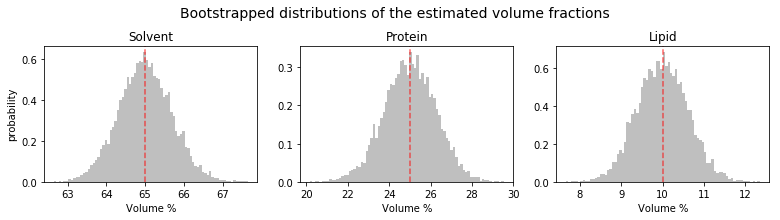

In [23]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(13, 2.5))

axes[0].hist(bootstrapped_vols[0], bins=80, density=True, color='grey', alpha=0.5)
axes[0].axvline(result[0][0], color='red', linestyle='--', alpha=0.6), axes[0].set_ylabel('probability')
axes[0].set_xlabel('Volume %'), axes[0].set_title('Solvent')

axes[1].hist(bootstrapped_vols[1], bins=80, density=True, color='grey', alpha=0.5)
axes[1].axvline(result[1][0], color='red', linestyle='--', alpha=0.6)
axes[1].set_xlabel('Volume %'), axes[1].set_title('Protein')

axes[2].hist(bootstrapped_vols[2], bins=80, density=True, color='grey', alpha=0.5)
axes[2].axvline(result[2][0], color='red', linestyle='--', alpha=0.6)
axes[2].set_xlabel('Volume %'), axes[2].set_title('Lipid')

fig.suptitle('Bootstrapped distributions of the estimated volume fractions', fontsize=14, y=1.1)
plt.show()